<a href="https://colab.research.google.com/github/abkimc/CV-course-test-prepration/blob/main/Image_processing_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

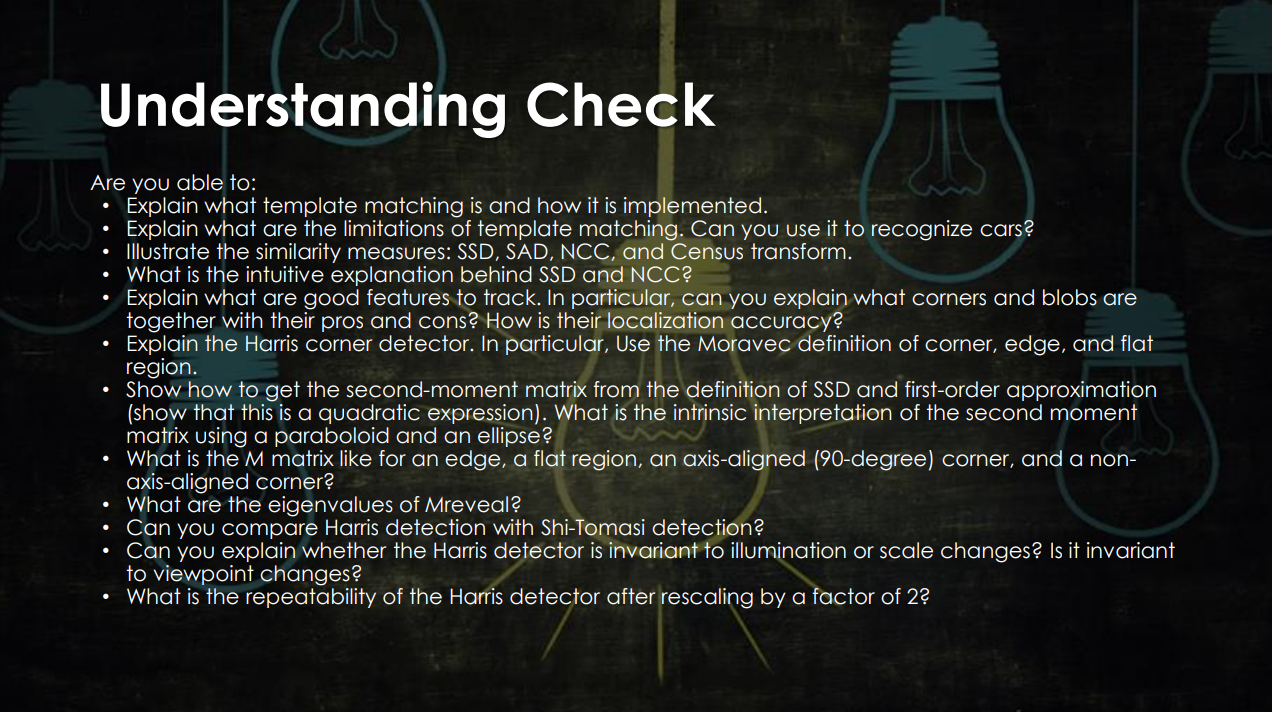

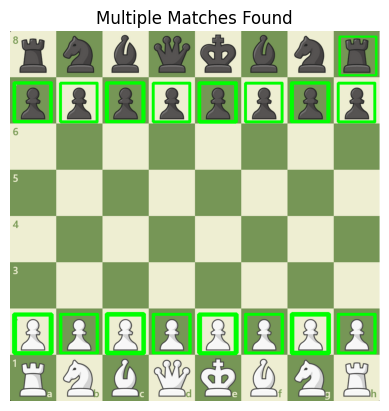

In [28]:
# Explain what template matching is and how it is implemented.
# Template matching is a method in computer vision used to find occurrences of a template image within a larger image.
# It essentially slides the template image across the larger image, comparing the template to the section of the larger image at each position.
# The comparison is typically done pixel-by-pixel, and a similarity metric is computed for each position. The positions with the highest similarity scores indicate the most likely locations of the template in the larger image.

# Implementation Details:

# 1. Image Representation: Both the template and the larger image are typically represented as matrices of pixel values (grayscale or color).

# 2. Similarity Metrics:  Various metrics can be used to quantify the similarity between the template and the image patch:
#    - Normalized Cross-Correlation (NCC): This is a common choice, as it normalizes the pixel values, making the method less sensitive to variations in lighting.
#    - Sum of Squared Differences (SSD):  This calculates the sum of the squared differences between corresponding pixel values.  Lower values indicate higher similarity.
#    - Mean Squared Error (MSE):  Similar to SSD, but divided by the number of pixels.
#    - Other metrics like template matching with Fourier transforms are also possible.

# 3. Sliding Window: The template is slid across the larger image, pixel by pixel or with a certain step size.  For each position, a comparison is made between the template and the corresponding window in the larger image.

# 4. Thresholding: A threshold is often applied to the similarity scores to filter out weak matches.  Only positions with similarity scores above the threshold are considered as potential matches.

# 5. Post-processing (optional):  Further processing, such as non-maximum suppression, may be used to refine the results and eliminate overlapping or redundant matches.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the images in color
image = cv2.imread("chess.png")  # Load full image
template = cv2.imread("pawn.png")  # Load template

# Convert images from BGR to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# Perform template matching
result = cv2.matchTemplate(image_rgb, template_rgb, cv2.TM_CCOEFF_NORMED)

# Set a threshold for multiple matches
threshold = 0.3  # Lowered to find weaker matches
locations = np.where(result >= threshold)  # Find all matching locations

# Ensure we found matches
if len(locations[0]) == 0:
    print("No matches found. Try lowering the threshold or adjusting the template.")

# Draw rectangles around detected matches
for pt in zip(*locations[::-1]):  # Reverse order for OpenCV
    top_left = pt
    bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 3)  # Green rectangles

# Display results
#cv2_imshow(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))  # Convert to BGR for OpenCV
plt.imshow(image_rgb)
plt.title("Multiple Matches Found")
plt.axis("off")
plt.show()

# Key Considerations:

# - Image Pre-processing:  Pre-processing steps, such as noise reduction or edge detection, can improve matching accuracy.
# - Template Size:  The size of the template and potential variations are important factors.
# - Computational Cost: Template matching can be computationally expensive for large images and templates.
# - Lighting and Rotation Variations: The method's sensitivity to variations in lighting and rotation needs to be carefully addressed.  In such cases, more robust techniques may be required.

In [ ]:
# Explain what are the limitations of template matching. Can you use it to recognize cars?
# template matching will only work if scale orientation illumination and in general the appearance of the template including anything in the background and the object to detect are very similar
# you could recognize cars but the thing is that cars are not all similar to each other so every time you want to detect a car you have to get a new template which will be not practical

In [ ]:
# Illustrate the similarity measures: SSD, SAD, NCC, and Census transform.

# 1. Sum of Squared Differences (SSD)
# SSD measures the difference between the template and a region in the image by squaring the differences between pixel values.
# Lower SSD means a better match (since differences are minimized).

# 2. Sum of Absolute Differences (SAD)
# SAD is similar to SSD but uses absolute differences instead of squared differences.
# Lower SAD means a better match.
# SAD is faster than SSD since it avoids squaring operations.

# 3. Normalized Cross-Correlation (NCC)
# NCC measures the similarity between the image and the template in a scale-invariant way.
# Higher NCC means a better match (since it measures correlation).
# NCC is more robust to brightness changes.

# 4. Census Transform
# The Census Transform encodes local pixel patterns by comparing each pixel to its neighbors.

# Compare each pixel in a 3×3 neighborhood with the center pixel.
# Assign 1 if the neighbor is brighter, 0 otherwise.
# Convert the binary pattern into a bitstring.

In [ ]:
# What is the intuitive explanation behind SSD and NCC?

# SSD is a straightforward measure of pixel-wise differences, while NCC provides a normalized measure of similarity that is more robust to intensity variations.

# Explain what are good features to track. In particular, can you explain what corners and blobs are together with their pros and cons? How is their localization accuracy?
distinctive points or regions in an image that can be reliably detected and matched across different images or frames. These features are crucial for tasks like object tracking, stereo vision, and image stitching. Two common types of features are corners and blobs. Here's an explanation of each, along with their pros, cons, and localization accuracy:

**Corners**
Definition: Corners are points in an image where there is a significant change in intensity in multiple directions. They are typically formed at the intersection of edges.

**Detection**: Algorithms like the Harris Corner Detector or Shi-Tomasi Corner Detector are used to identify corners.

**Intuition:** Corners are good features because they are unique and can be localized precisely. They are often found at the junctions of objects or structures in an image.

**Pros:**

* High Localization Accuracy: Corners can be localized very precisely, often to sub-pixel accuracy.

* Distinctiveness: Corners are unique and less likely to be confused with other points in the image.

* Efficient to Compute: Corner detection algorithms are computationally efficient.

**Cons:**

* Sensitivity to Noise: Corners can be affected by noise or blur, which may reduce their detectability.

* Limited in Textureless Regions: In regions with no edges or texture (e.g., a blank wall), corners may not be detected.

* Localization Accuracy: Corners have very high localization accuracy, often to sub-pixel precision, making them ideal for tasks requiring precise alignment or matching.

**Blobs**
Definition: Blobs are regions in an image that differ in properties (e.g., intensity, color, or texture) compared to their surroundings. They are often associated with objects or patterns in the image.

**Detection**: Algorithms like the Laplacian of Gaussian (LoG), Difference of Gaussians (DoG), or SIFT (Scale-Invariant Feature Transform) are used to detect blobs.

**Intuition: **Blobs are good features because they capture regions of interest, such as objects or textures, and are often invariant to scale and rotation.

**Pros:**

* Scale and Rotation Invariance: Blob detectors like SIFT can identify features that are robust to changes in scale and rotation.

* Rich in Information: Blobs often represent entire objects or regions, providing more contextual information than corners.

* Robust to Noise: Blob detectors are generally more robust to noise compared to corner detectors.

**Cons:**

* Lower Localization Accuracy: Blobs are localized to a region rather than a precise point, so their localization accuracy is lower than corners.

* Computationally Expensive: Blob detection algorithms (e.g., SIFT) are more computationally intensive than corner detectors.

* Less Distinctive: Blobs may not be as unique as corners, especially in cluttered scenes.

**Localization Accuracy:** Blobs have lower localization accuracy compared to corners because they represent regions rather than precise points. However, they are still useful for tasks where precise localization is not critical.

**Blobs**: Use blobs when you need robustness to scale, rotation, or noise, such as in object recognition, image matching, or feature-based retrieval.

In summary, corners are ideal for tasks requiring high precision, while blobs are better suited for tasks requiring robustness to transformations and noise. The choice depends on the specific requirements of your application.

**The Harris corner detector** is a popular algorithm in computer vision for detecting corners in an image. It is based on the idea that corners are points where the intensity of the image changes significantly in multiple directions. To understand the Harris corner detector, it's helpful to start with the Moravec corner detector, which provides a simpler but less robust definition of corners, edges, and flat regions.

**Moravec Corner Detector**
The Moravec detector defines corners, edges, and flat regions based on how much the image intensity changes when a small window is shifted in different directions.

**Flat Region:**

In a flat region, the image intensity is relatively constant.

When the window is shifted in any direction, there is little to no change in intensity.

Mathematically, the sum of squared differences (SSD) between the original window and the shifted window is small in all directions.

**Edge:**

In an edge region, the image intensity changes significantly in one direction but remains constant along the edge.

When the window is shifted along the edge, there is little change in intensity (small SSD).

When the window is shifted perpendicular to the edge, there is a large change in intensity (large SSD).

**Corner:**

In a corner region, the image intensity changes significantly in multiple directions.

When the window is shifted in any direction, there is a large change in intensity (large SSD in all directions).


**Moravec detector has limitations:**

* It is not rotation-invariant.

* It only considers a few discrete shift directions, which can lead to inaccuracies.


**Harris Corner Detector**
The Harris corner detector improves upon the Moravec detector by using a more rigorous mathematical framework. Instead of computing SSD for discrete shifts, it uses a second-order moment matrix (also called the structure tensor) to analyze the intensity changes in all directions.

**Steps in the Harris Corner Detector:**
**Compute Image Gradients:**

Calculate the horizontal (IxIx​ ) and vertical (IyIy​) gradients of the image using a Sobel or similar filter.

These gradients represent the intensity changes in the xx and yy directions.

**Construct the Structure Tensor:**

* For each pixel, construct the second-order moment matrix M:
* The sums are taken over a small window around the pixel, and the terms Ix^2​ ,
Iy^2​ , and
IxIy
represent the gradients' contributions.

**Analyze the Eigenvalues of M:**

M describe the intensity changes in the principal directions.

If both eigenvalues are small, the region is flat.

If one eigenvalue is large and the other is small, the region is an edge.

If both eigenvalues are large, the region is a corner.

**Compute the Corner Response Function:**

Instead of explicitly computing the eigenvalues, Harris introduces a corner response function

**Threshold and Non-Maximum Suppression:**

Apply a threshold to
R
R to identify strong corners.

Use non-maximum suppression to ensure that only the most prominent corners are retained.


In [ ]:
# Show how to get the second-moment matrix from the definition of SSD and first-order approximation (show that this is a quadratic expression). What is the intrinsic interpretation of the second moment matrix using a paraboloid and an ellipse?


In [ ]:
# What is the M matrix like for an edge, a flat region, an axis-aligned (90-degree) corner, and a non-axis-aligned corner?
# Flat Region
# In a flat region, the image intensity is constant, so the gradients are 0

# Edge
# In an edge region, the intensity changes significantly in one direction (perpendicular to the edge) but remains constant along the edge.

# Axis-Aligned Corner (90-degree corner)
# An axis-aligned corner is a corner where the edges are aligned with the x and y axes. In this case, the intensity changes significantly in both the x and y directions.

# Non-Axis-Aligned Corner
# non-axis-aligned corner is a corner where the edges are not aligned with the x and y axes. In this case, the gradients IxIx and IyIy​ are both large, and they are not orthogonal.

In [ ]:
# What are the eigenvalues of M reveal?
# The eigenvalues of the second-moment matrix M  reveal information about the local intensity structure of an image.
# they help us distinguish between flat regions, edges, and corners.


# Flat Region:
# Eigenvalues: λ1≈0, λ1​ ≈0,
# Interpretation: There is little to no change in intensity in any direction. The image is locally constant.

# Edge:
# Eigenvalues: λ1​ is large,λ2 ≈ 0.
# Interpretation: There is a significant change in intensity in one direction (perpendicular to the edge) but little to no change along the edge.

# Corner:
# Eigenvalues: Both λ1 and λ2 are large.
# Interpretation: There are significant changes in intensity in multiple directions, indicating a corner or a highly textured region.


In [ ]:


# Can you compare Harris detection with Shi-Tomasi detection?
# Harris corner detection and Shi-Tomasi detection are both feature detection algorithms, but Shi-Tomasi modifies Harris's corner scoring function to make it more robust.
# While Harris detection uses the determinant and trace of the gradient matrix to find corners (R = det(M) - k*trace(M)²), Shi-Tomasi directly uses the minimum eigenvalue of the gradient matrix as the corner score,
# which proves to be more reliable in practice. Both methods analyze image gradients in local windows to detect corners,
# but Shi-Tomasi generally performs better in tracking applications due to its more stable corner selection criteria



# Can you explain whether the Harris detector is invariant to illumination or scale changes? Is it invariant to viewpoint changes?

# Illumination Invariance:

# The Harris detector is partially invariant to illumination changes, particularly for uniform/additive brightness changes. This is because it uses gradients (differences between pixel intensities) rather than absolute pixel values.
# However, it's not fully invariant to all lighting changes, especially non-uniform or multiplicative changes that significantly alter the image contrast.

# Scale Invariance:

# The basic Harris detector is NOT scale invariant. It will detect different corners when the image is scaled up or down.
# This is because it uses a fixed window size for gradient calculations, which means it can miss features that become larger or smaller than this window.
# To address this limitation, scale-invariant versions like the Harris-Laplace detector were developed, which incorporate scale space theory.

# Viewpoint/Rotation Invariance:

# Harris detector IS rotationally invariant - it will detect the same corner even if the image is rotated.
# However, it is only partially invariant to affine transformations and viewpoint changes.
# It can handle small viewpoint changes (up to about 20-30 degrees), but fails for larger perspective transformations.
# This is because significant viewpoint changes can dramatically alter the appearance of corners in the image.



# What is the repeatability of the Harris detector after rescaling by a factor of 2?
# the repeatability of the Harris detector drops significantly after rescaling by a factor of 2, typically falling to around 50-60% compared to the original image. This poor performance under scale changes is one of the key limitations that led to the development of scale-invariant detectors like Harris-Laplace and SIFT.
#The low repeatability occurs because:

# The fixed window size used in Harris detection becomes inappropriate for the rescaled features
# The gradient calculations are sensitive to the absolute size of the corner structures
# Corner strength measurements change non-linearly with scaling

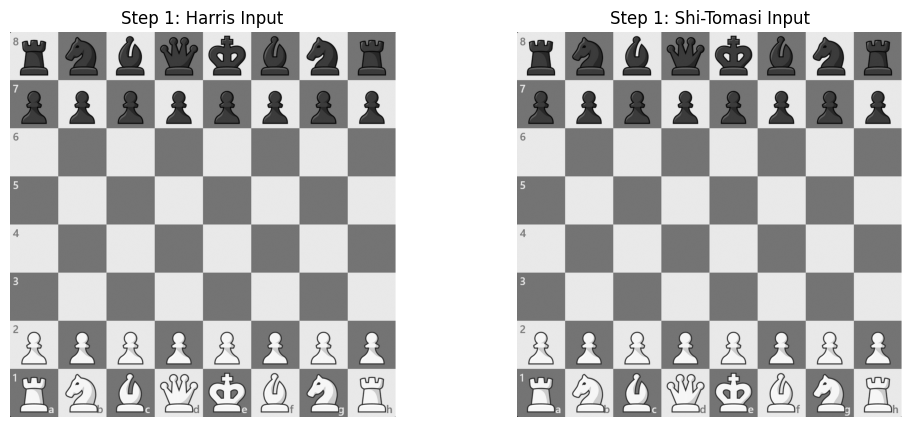

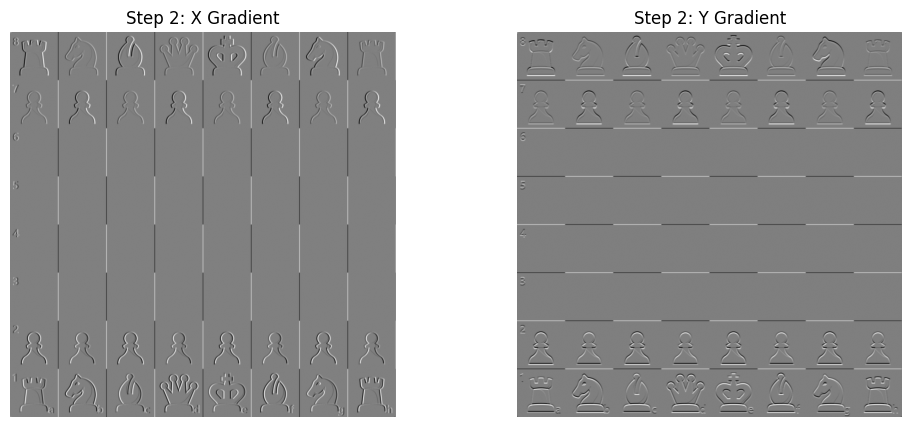

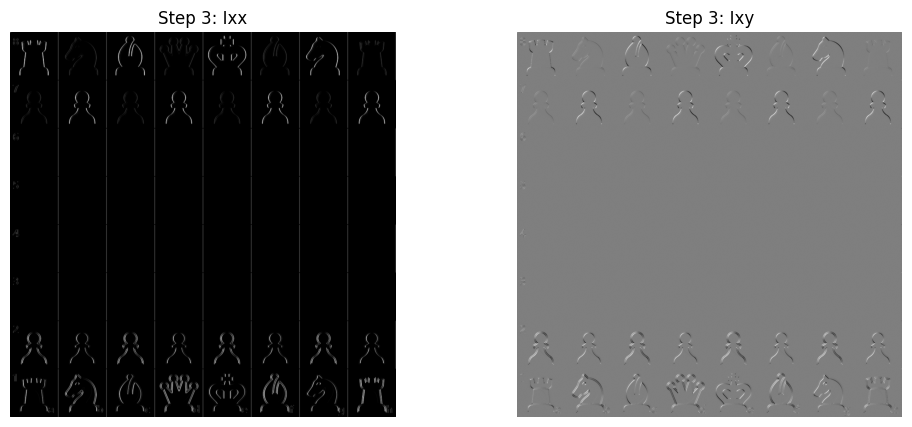

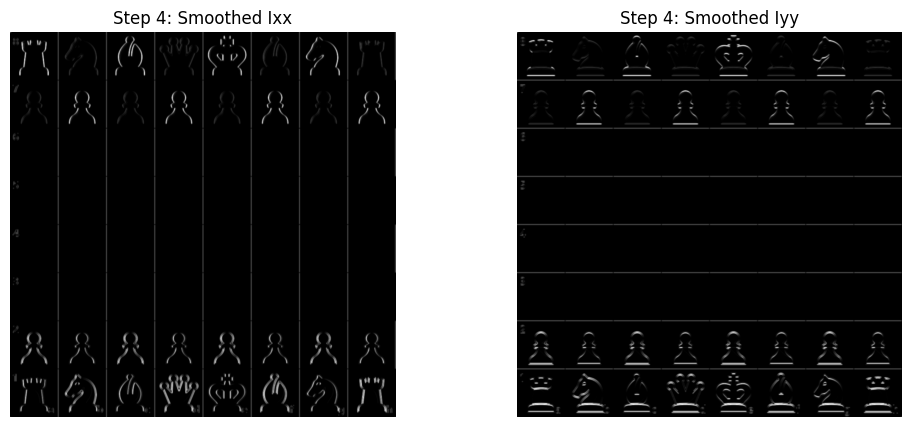

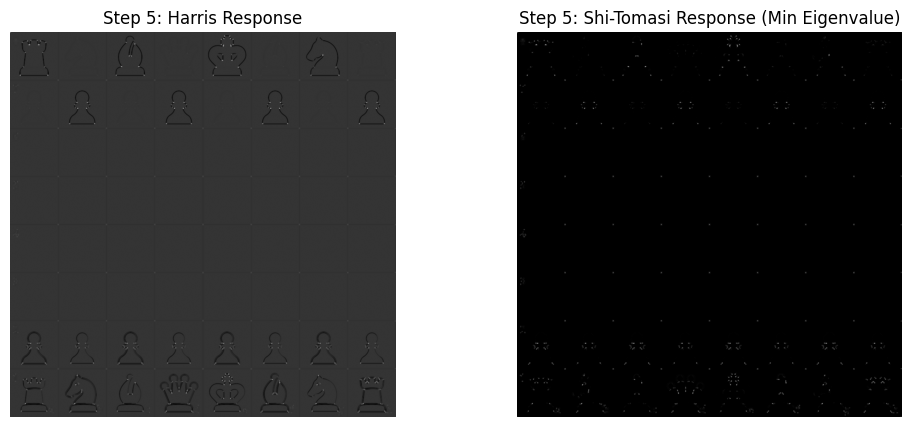

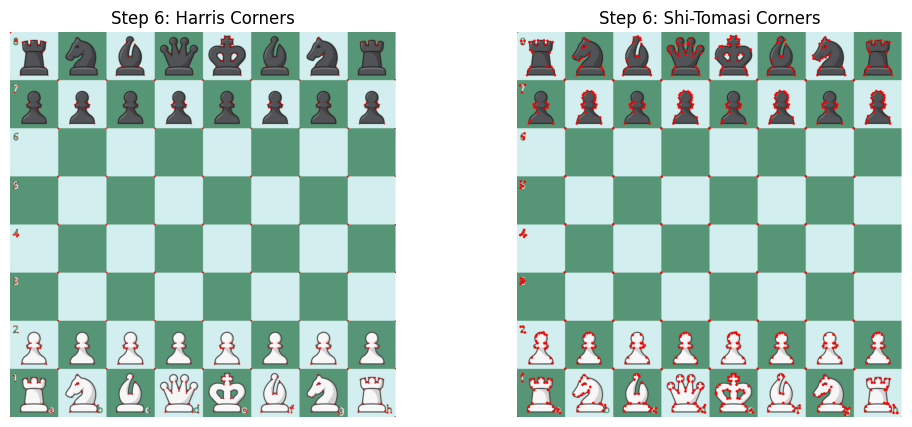

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_step(left_img, right_img, left_title, right_title, step_num):
    """Helper function to plot images side by side"""
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.imshow(left_img, cmap='gray' if len(left_img.shape) == 2 else None)
    plt.title(f"Step {step_num}: {left_title}")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(right_img, cmap='gray' if len(right_img.shape) == 2 else None)
    plt.title(f"Step {step_num}: {right_title}")
    plt.axis('off')
    plt.show()

def step_by_step_corner_detection(image_path="chess.png"):
    # Step 1: Load and convert to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plot_step(gray, gray, "Harris Input", "Shi-Tomasi Input", 1)

    # Step 2: Compute gradients
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    plot_step(dx, dy, "X Gradient", "Y Gradient", 2)

    # Step 3: Compute gradient products
    Ixx = dx * dx
    Iyy = dy * dy
    Ixy = dx * dy
    plot_step(Ixx, Ixy, "Ixx", "Ixy", 3)

    # Step 4: Apply Gaussian smoothing
    k_size = 3
    sigma = 1.0
    Sxx = cv2.GaussianBlur(Ixx, (k_size, k_size), sigma)
    Syy = cv2.GaussianBlur(Iyy, (k_size, k_size), sigma)
    Sxy = cv2.GaussianBlur(Ixy, (k_size, k_size), sigma)
    plot_step(Sxx, Syy, "Smoothed Ixx", "Smoothed Iyy", 4)

    # Step 5: Compute corner responses
    # Harris Response
    k = 0.04
    det_M = Sxx * Syy - Sxy * Sxy
    trace_M = Sxx + Syy
    harris_response = det_M - k * trace_M * trace_M

    # Shi-Tomasi Response
    eigvals = np.zeros_like(gray, dtype=np.float64)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            M = np.array([[Sxx[i,j], Sxy[i,j]],
                         [Sxy[i,j], Syy[i,j]]])
            eigenvalues = np.linalg.eigvals(M)
            eigvals[i,j] = np.min(eigenvalues)

    plot_step(harris_response, eigvals,
             "Harris Response", "Shi-Tomasi Response (Min Eigenvalue)", 5)

    # Step 6: Threshold and Non-maximum suppression
    harris_thresh = 0.01 * harris_response.max()
    shi_tomasi_thresh = 0.01 * eigvals.max()

    harris_corners = img.copy()
    shi_tomasi_corners = img.copy()

    # Harris corners
    harris_corners[harris_response > harris_thresh] = [255, 0, 0]

    # Shi-Tomasi corners (with non-maximum suppression)
    window_size = 3
    for i in range(window_size, gray.shape[0] - window_size):
        for j in range(window_size, gray.shape[1] - window_size):
            if eigvals[i,j] > shi_tomasi_thresh:
                window = eigvals[i-window_size:i+window_size+1,
                               j-window_size:j+window_size+1]
                if eigvals[i,j] == np.max(window):
                    cv2.circle(shi_tomasi_corners, (j, i), 3, (255, 0, 0), -1)

    plot_step(harris_corners, shi_tomasi_corners,
             "Harris Corners", "Shi-Tomasi Corners", 6)

    return harris_response, eigvals

# Run the step-by-step demonstration
harris_response, shi_tomasi_response = step_by_step_corner_detection()
